1) 2)  Importation des fichers

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np

In [6]:
df1=pd.read_csv("superficie.csv",header=None)
df2=pd.read_csv("nombre_de_sdb.csv",header=None)
df3=pd.read_csv("nombre_de_chambres.csv",header=None)

In [7]:
# affichage de 3 premières lignes de chaque data

In [8]:
print(df1.head(3))

   0      1
0  0  28844
1  1  27667
2  2  14742


In [9]:
print(df2.head(3))

   0  1
0  0  2
1  1  1
2  2  1


In [10]:
print(df3.head(3))

   0  1
0  0  1
1  1  4
2  2  1


3)  nomination des colonnes des datasets

In [11]:
# les colonnes des  datasets ci-dessus n'ont pas d'entete et qu'il ya 2 colonnes d'indices
# Resolvons ces deux problèmes

In [12]:
# nomination des colonnes des datasets
df1.columns=['Id','superficie']
df2.columns=['Id','nbre_sdb']
df3.columns=['Id','nbre_chambres']

In [13]:
#suppression de la pseudo colonne de chaque dataset
df1=df1.drop('Id',1)
df2=df2.drop('Id',1)
df3=df3.drop('Id',1)

In [14]:
# affichage de 3 premières lignes de chaque dataset après nomination des colonnes

In [15]:
df1.head(3)

,superficie
0,28844
1,27667
2,14742


In [16]:
df2.head(3)

,nbre_sdb
0,2
1,1
2,1


In [17]:
df3.head(3)

,nbre_chambres
0,1
1,4
2,1


4) Fusion des datasets

In [18]:
dataset=pd.concat([df1,df2,df3],axis=1)

In [19]:
dataset.head(5)

,superficie,nbre_sdb,nbre_chambres
0,28844,2,1
1,27667,1,4
2,14742,1,1
3,28089,3,4
4,11713,1,2


5) Superficie moyenne des maisons

In [20]:
surf_mais=dataset['superficie'].mean()

In [21]:

print('la superficie moyenne des maisons de notre dataset est de :{} '.format(surf_mais))

la superficie moyenne des maisons de notre dataset est de :20439.77 


6) moyenne et mediane du nombre de chambres

In [22]:
moy_chamb=dataset['nbre_chambres'].mean()
media_chamb=dataset['nbre_chambres'].median()


In [23]:
print('la moyenne des chambres est {} et la mediane est {}'.format(moy_chamb,media_chamb))

la moyenne des chambres est 2.42 et la mediane est 2.0


7)
* Import house_price.csv 
* Créez un id pour dataset qui sera égal à l’index de dataset
* Fusionnez house_price à dataset 


In [25]:
#importation du house_price
house_price=pd.read_csv("house_price.csv")


In [26]:
# création de l'id dans dataset
dataset['id']=dataset.index

In [27]:
# fusion du dataset et de house_price
data=pd.merge(dataset,house_price,on='id',how='inner')

In [28]:
### Tu peux aussi enlever la colonne qui ne sert à rien (Unnamed: 0)
data = data.iloc[:,data.columns != "Unnamed: 0"]

In [29]:
data.head(5)

,superficie,nbre_sdb,nbre_chambres,id,house_price
0,28844,2,1,0,1421908.0
1,27667,1,4,1,1305091.0
2,14742,1,1,2,164373.0
3,28089,3,4,3,1441714.0
4,11713,1,2,4,108290.0


8) coût moyen d’une maison 

In [30]:
cout_moyen=data['house_price'].mean()
print("le coût moyen d'une maison est de :{}".format(cout_moyen))

le coût moyen d'une maison est de :767747.87


9) coût moyen par chambre 

In [31]:
cout_moyen_par_chambre=data['house_price'].sum()/data['nbre_chambres'].sum()
print("le coût moyen par chambre est de :{}".format(round(cout_moyen_par_chambre,2)))


### Ici, tu aurais pu utiliser un groupby qui fonctionne très bien aussi 
####dataset.groupby("nbre_chambres").mean()

le coût moyen par chambre est de :317251.19


10) création d'une colonne taille_maison
* “une maison dont la taille est supérieure à 25 000 sqrt_feet”
*	 “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”
*	“une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”
*	 “une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet” 
*	“une maison dont la taille est inférieure à 10 000 sqrt_feet


In [26]:
# creation d'une liste selon l'indice de la superficie
taille_maison=[]
for i in data["superficie"]:
    if i>25000:
        taille_maison.append('très grande')
    elif 20000<i<=25000:
        taille_maison.append('grande')
    elif 15000<i<=20000:
        taille_maison.append('moyenne')    
    elif 10000<i<=15000:
        taille_maison.append('petite')
    else:
        taille_maison.append('très petite')

In [27]:
# ajout de la colonne au dataframe
data['taille_maison']=taille_maison

In [28]:
data.head()

,superficie,nbre_sdb,nbre_chambres,id,Unnamed: 0,house_price,taille_maison
0,28844,2,1,0,32,1421908.0,très grande
1,27667,1,4,1,71,1305091.0,très grande
2,14742,1,1,2,65,164373.0,petite
3,28089,3,4,3,88,1441714.0,très grande
4,11713,1,2,4,49,108290.0,petite


11) Le coût moyen d’une maison en fonction de sa catégorie de superficie 

In [29]:
#Création d'un dictionnaire ayant pour clé la categorie de superficie et pour valeur sa moyenne
dict_moyenne={}
categories=['très grande','grande','moyenne','petite']
for categorie in categories:
    k=data[data['taille_maison']==categorie]['house_price']
    dict_moyenne[categorie]=round(k.mean(),2)

In [30]:
for categorie,cout_moyen in dict_moyenne.items():
    print("pour des superficies de la  categorie dite {},le cout moyen est de {}".format(categorie,cout_moyen))
    

pour des superficies de la  categorie dite très grande,le cout moyen est de 1552456.06
pour des superficies de la  categorie dite grande,le cout moyen est de 732538.52
pour des superficies de la  categorie dite moyenne,le cout moyen est de 325694.79
pour des superficies de la  categorie dite petite,le cout moyen est de 156138.69


12)  visualisation du résultat et  conclusion

In [31]:
import seaborn as sns

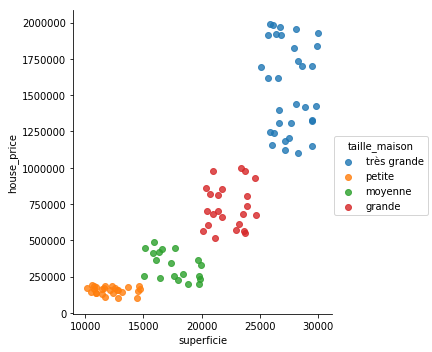

In [50]:
sns.lmplot(x ="superficie", y="house_price", data = data, fit_reg=False, hue='taille_maison')

En resumé d'après le résultat de ce dataset,les prix des maisons dependent de leurs tailles

Bonus

On peut aller loin en regardant comment evolue les prix des maisons par rapport à chaque categorie de la de la maison

In [52]:
# convertissons les valeurs categorielles en numeriques
dataf=pd.get_dummies(data,drop_first=True)

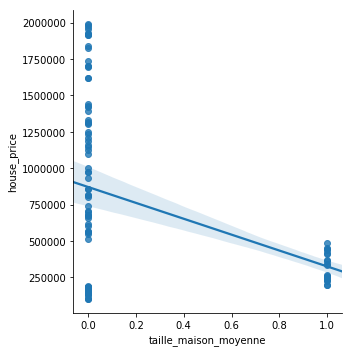

In [46]:
sns.lmplot(x ="taille_maison_moyenne", y="house_price", data = dataf)

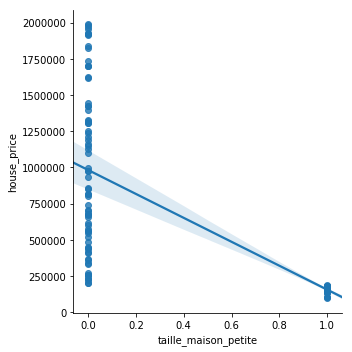

In [47]:
sns.lmplot(x ="taille_maison_petite", y="house_price", data = dataf)

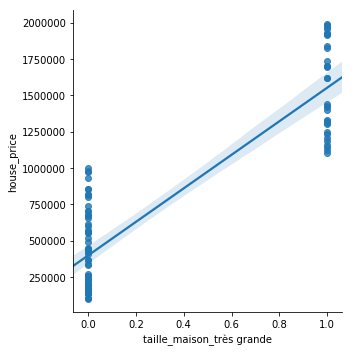

In [48]:
sns.lmplot(x ="taille_maison_très grande", y="house_price", data = dataf)